In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.models import Model,Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import GlobalAveragePooling2D

In [8]:
batch_size = 32
img_height = 150
img_width = 150

In [9]:
data_dir='/content/drive/MyDrive/Datasets/Datasets'
train=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.1,
                                                subset='training',seed=123)
val=tf.keras.utils.image_dataset_from_directory(data_dir,image_size=(img_height,img_width),
                                                validation_split=0.2,
                                                subset='validation',seed=123)

Found 3627 files belonging to 4 classes.
Using 3265 files for training.
Found 3627 files belonging to 4 classes.
Using 725 files for validation.


In [10]:
label_to_class_name = dict(zip(range(len(train.class_names)), train.class_names))
label_to_class_name

{0: 'cyst', 1: 'normal', 2: 'stone', 3: 'tumour'}

In [11]:
for image_batch, labels_batch in train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


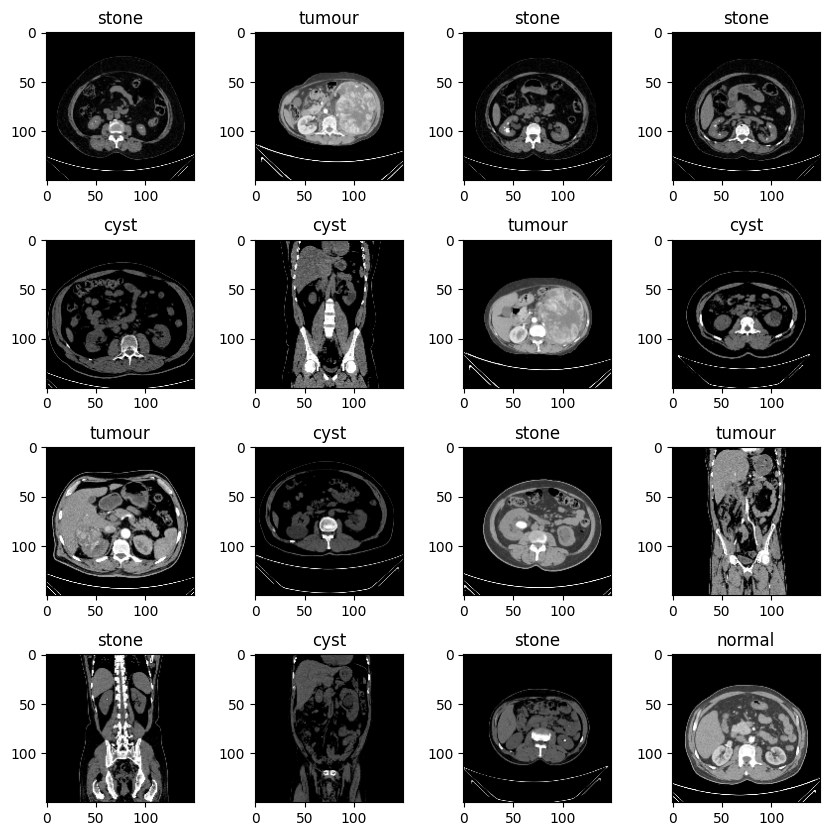

In [12]:
data_iterator = train.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i in range(4):
    for j in range(4):
        index = i * 4 + j
        ax[i, j].imshow(batch[0][index].astype(int))
        ax[i, j].set_title(label_to_class_name[batch[1][index]])
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [13]:
train=train.map(lambda x,y:(x/255,y))
val=val.map(lambda x,y:(x/255,y))

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

In [84]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4, activation=tf.nn.softmax)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [85]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 528s 5s/step - accuracy: 0.8475 - loss: 0.4440 - val_accuracy: 0.9972 - val_loss: 0.0087
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 36s 15ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9972 - val_loss: 0.0065
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 1.8405e-04 - val_accuracy: 0.9972 - val_loss: 0.0069
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 9.4513e-05 - val_accuracy: 0.9972 - val_loss: 0.0072
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 5.9707e-05 - val_accuracy: 0.9972 - val_loss: 0.0076
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 4.1563e-05 - val_accuracy: 0.9972 - val_loss: 0.0079
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 1.0000 - loss: 3.0608e-05 - val_accuracy: 0.9972 - val_loss: 0.0082
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 1.0000 - lo

In [81]:
model.save("CNN_model.h5")

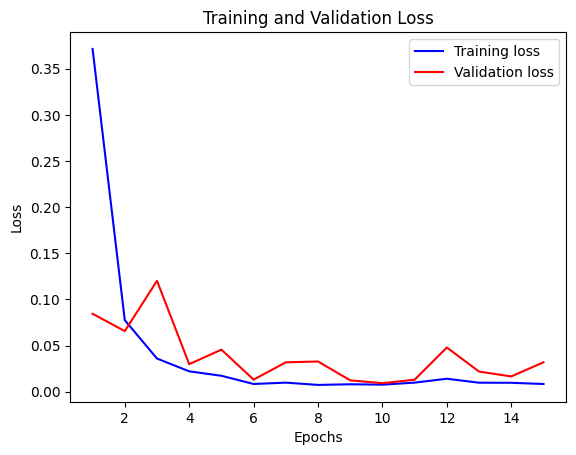

In [82]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

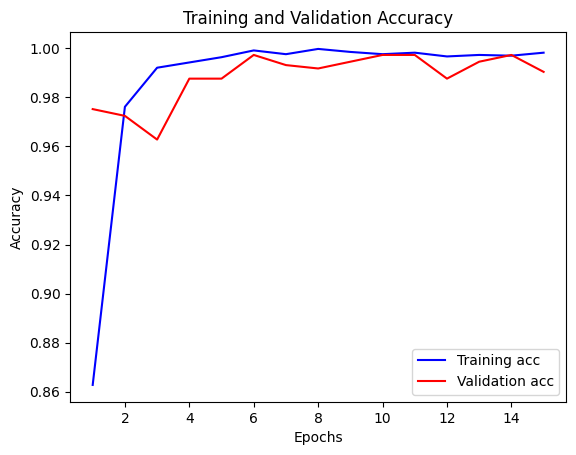

In [83]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

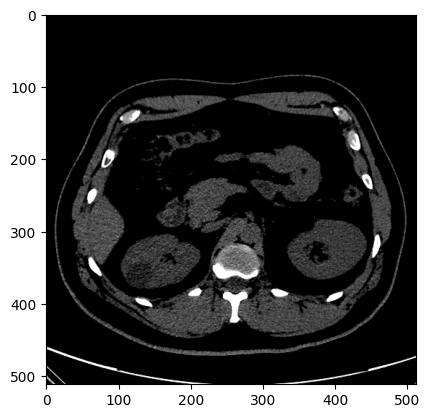

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


'cyst'

In [25]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/cyst/Cyst- (10).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [26]:
VGG_model = Sequential()

pretrained_model= tf.keras.applications.VGG16(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


VGG_model.add(pretrained_model)
VGG_model.add(Flatten())
VGG_model.add(Dense(512, activation='relu'))
VGG_model.add(BatchNormalization())  # Batch Normalization layer
VGG_model.add(Dropout(0.5))

VGG_model.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

In [27]:
VGG_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [39]:
VGG_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,512,910 (59.18 MB)

 Trainable params: 265,732 (1.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

 Optimizer params: 531,466 (2.03 MB)

In [31]:
epochs=15
history = VGG_model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 31s 186ms/step - accuracy: 0.7055 - loss: 0.8231 - val_accuracy: 0.9228 - val_loss: 0.3387
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9509 - loss: 0.1344 - val_accuracy: 0.9945 - val_loss: 0.0917
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9845 - loss: 0.0569 - val_accuracy: 0.9972 - val_loss: 0.0391
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 10s 81ms/step - accuracy: 0.9898 - loss: 0.0396 - val_accuracy: 0.9931 - val_loss: 0.0281
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 91ms/step - accuracy: 0.9928 - loss: 0.0279 - val_accuracy: 0.9972 - val_loss: 0.0252
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 0.9947 - loss: 0.0223 - val_accuracy: 0.9972 - val_loss: 0.0209
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.9971 - loss: 0.0176 - val_accuracy: 0.9972 - val_loss: 0.0208
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 9s 89ms/step - accuracy: 0.9983 - loss: 0.0110 - val

In [70]:
VGG_model.save("VGG_model.h5")

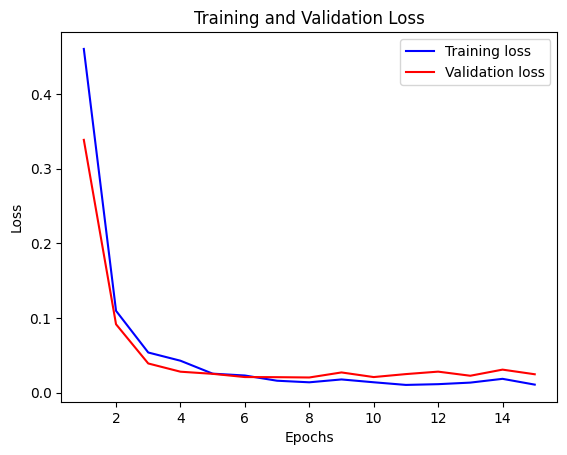

In [33]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

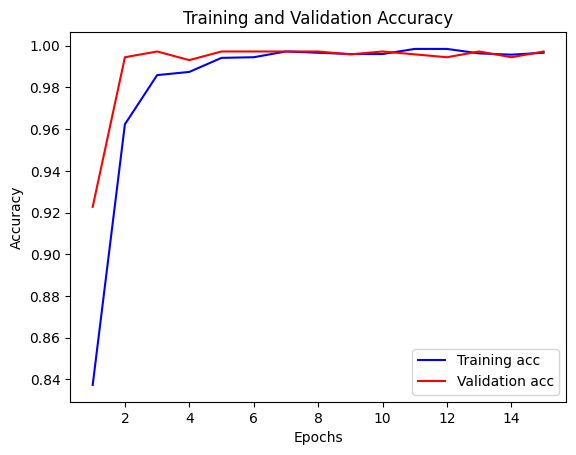

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

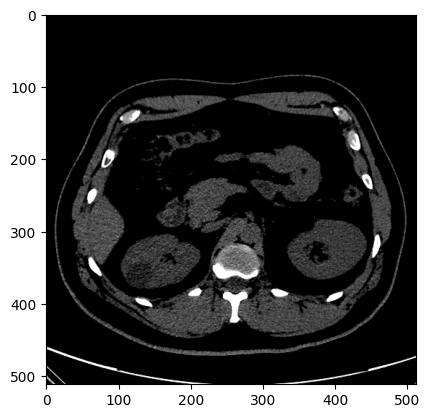

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 558ms/step


'cyst'

In [35]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/cyst/Cyst- (10).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = VGG_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [48]:
mobile_net = Sequential()

pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,
                   input_shape=(150,150,3),
                   pooling='max',classes=4,
                   weights='imagenet')


mobile_net.add(pretrained_model)
mobile_net.add(Flatten())
mobile_net.add(Dense(512, activation='relu'))
mobile_net.add(BatchNormalization())  # Batch Normalization layer
mobile_net.add(Dropout(0.5))

mobile_net.add(Dense(4, activation='softmax'))
pretrained_model.trainable=False

<ipython-input-48-a414305bff42>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model= tf.keras.applications.MobileNetV2(include_top=False,


In [49]:
mobile_net.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [52]:
mobile_net.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,235,854 (16.16 MB)

 Trainable params: 658,948 (2.51 MB)

 Non-trainable params: 2,259,008 (8.62 MB)

 Optimizer params: 1,317,898 (5.03 MB)

In [51]:
epochs=15
history = mobile_net.fit(
  train,
  validation_data=val,
  epochs=epochs
)

Epoch 1/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 22s 117ms/step - accuracy: 0.7446 - loss: 0.6999 - val_accuracy: 0.9752 - val_loss: 0.0845
Epoch 2/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9737 - loss: 0.0890 - val_accuracy: 0.9724 - val_loss: 0.0657
Epoch 3/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9948 - loss: 0.0310 - val_accuracy: 0.9628 - val_loss: 0.1202
Epoch 4/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9926 - loss: 0.0245 - val_accuracy: 0.9876 - val_loss: 0.0299
Epoch 5/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9963 - loss: 0.0181 - val_accuracy: 0.9876 - val_loss: 0.0456
Epoch 6/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9996 - loss: 0.0073 - val_accuracy: 0.9972 - val_loss: 0.0131
Epoch 7/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.9931 - val_loss: 0.0319
Epoch 8/15
103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9999 - loss: 0.0066 - val_ac

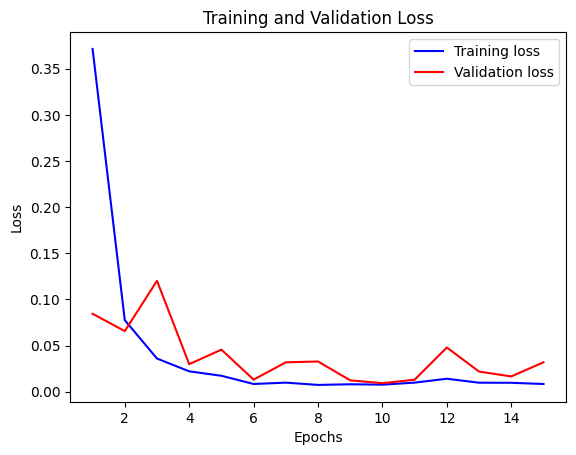

In [53]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

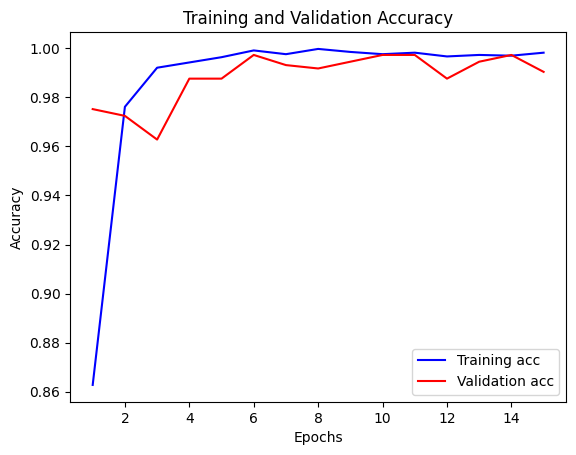

In [54]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

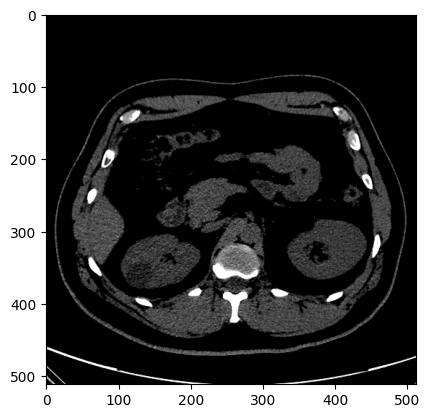

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


'cyst'

In [55]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/cyst/Cyst- (10).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = mobile_net.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]

In [71]:
mobile_net.save("Mobile_net.h5")

In [89]:
from keras.src.activations import softmax as softmax_v2

loaded_model = tf.keras.models.load_model('/content/CNN_model.h5', custom_objects={'softmax_v2': softmax_v2})

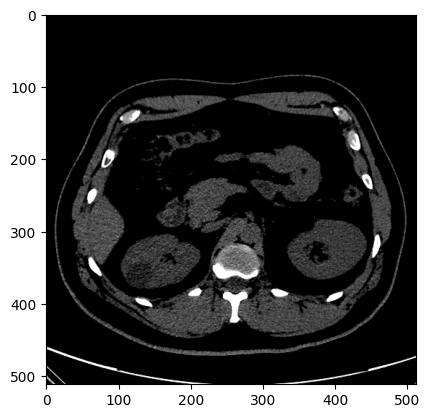

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


'cyst'

In [90]:
img = cv2.imread('/content/drive/MyDrive/Datasets/Datasets/cyst/Cyst- (10).jpg')
plt.imshow(img)
plt.show()
resize = tf.image.resize(img, (150,150))
yhat = loaded_model.predict(np.expand_dims(resize/255, 0))
max_index = np.argmax(yhat)
label_to_class_name[max_index]